In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("tendulkar_ODI.csv")

In [22]:
df.head()

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,1,0,-,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
1,2,0,2,2,0,0,0,5,caught,2,v New Zealand,Dunedin,1-Mar-90
2,3,36,51,39,5,0,92.3,6,caught,1,v New Zealand,Wellington,6-Mar-90
3,4,19,38,35,1,1,54.28,4,bowled,2,v England,Leeds,18-Jul-90
4,5,31,31,26,3,0,119.23,6,bowled,2,v England,Nottingham,20-Jul-90


In [23]:
df.dtypes

Unnamed: 0     int64
Runs          object
Mins          object
BF            object
4s            object
6s            object
SR            object
Pos           object
Dismissal     object
Inns          object
Opposition    object
Ground        object
Start Date    object
dtype: object

In [24]:
df[df.Runs == "DNB"]

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
8,9,DNB,-,-,-,-,-,-,-,2,v Bangladesh,Chandigarh,25-Dec-90
38,39,DNB,-,-,-,-,-,-,-,2,v Zimbabwe,Pune,25-Mar-93


In [25]:
df[df.Runs.str.contains("\*")]

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
30,31,82*,116,81,6,1,101.23,5,not out,1,v England,Jaipur,18-Jan-93
37,38,8*,8,6,0,0,133.33,5,not out,2,v Zimbabwe,Guwahati,22-Mar-93
42,43,26*,-,30,4,0,86.66,5,not out,2,v Sri Lanka,Kanpur,7-Nov-93
46,47,28*,-,43,2,0,65.11,5,not out,1,v West Indies,Kolkata,27-Nov-93
48,49,11*,25,18,0,0,61.11,5,not out,2,v Sri Lanka,Hyderabad (Deccan),18-Feb-94
73,74,127*,175,138,15,1,92.02,2,not out,2,v Kenya,Cuttack,18-Feb-96
96,97,65*,111,70,7,0,92.85,1,not out,2,v West Indies,Port of Spain,27-Apr-97
110,111,82*,110,86,6,0,95.34,4,not out,2,v Sri Lanka,Guwahati,22-Dec-97
120,121,100*,156,103,13,0,97.08,2,not out,2,v Kenya,Kolkata,31-May-98
124,125,127*,155,130,13,1,97.69,2,not out,2,v Zimbabwe,Bulawayo,26-Sep-98


In [26]:
df["Played"] = df.Runs.apply(lambda x: 0 if x == "DNB" else 1)

In [27]:
df[df.Played == 0]

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Played
8,9,DNB,-,-,-,-,-,-,-,2,v Bangladesh,Chandigarh,25-Dec-90,0
38,39,DNB,-,-,-,-,-,-,-,2,v Zimbabwe,Pune,25-Mar-93,0


In [28]:
df["Out"] = df.Runs.apply(lambda x: 0 if x[-1] == "*" else 1)

In [29]:
df[df.Out == 0]

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Played,Out
30,31,82*,116,81,6,1,101.23,5,not out,1,v England,Jaipur,18-Jan-93,1,0
37,38,8*,8,6,0,0,133.33,5,not out,2,v Zimbabwe,Guwahati,22-Mar-93,1,0
42,43,26*,-,30,4,0,86.66,5,not out,2,v Sri Lanka,Kanpur,7-Nov-93,1,0
46,47,28*,-,43,2,0,65.11,5,not out,1,v West Indies,Kolkata,27-Nov-93,1,0
48,49,11*,25,18,0,0,61.11,5,not out,2,v Sri Lanka,Hyderabad (Deccan),18-Feb-94,1,0
73,74,127*,175,138,15,1,92.02,2,not out,2,v Kenya,Cuttack,18-Feb-96,1,0
96,97,65*,111,70,7,0,92.85,1,not out,2,v West Indies,Port of Spain,27-Apr-97,1,0
110,111,82*,110,86,6,0,95.34,4,not out,2,v Sri Lanka,Guwahati,22-Dec-97,1,0
120,121,100*,156,103,13,0,97.08,2,not out,2,v Kenya,Kolkata,31-May-98,1,0
124,125,127*,155,130,13,1,97.69,2,not out,2,v Zimbabwe,Bulawayo,26-Sep-98,1,0


In [30]:
df.Runs = df.Runs.apply(lambda x: "0" if x == "DNB" else x)

In [31]:
df[df.Played == 0]

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Played,Out
8,9,0,-,-,-,-,-,-,-,2,v Bangladesh,Chandigarh,25-Dec-90,0,1
38,39,0,-,-,-,-,-,-,-,2,v Zimbabwe,Pune,25-Mar-93,0,1


In [33]:
df.dtypes

Unnamed: 0     int64
Runs          object
Mins          object
BF            object
4s            object
6s            object
SR            object
Pos           object
Dismissal     object
Inns          object
Opposition    object
Ground        object
Start Date    object
Played         int64
Out            int64
dtype: object

In [36]:
df[df.Runs == "TDNB"]

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Played,Out
233,234,TDNB,-,-,-,-,-,-,-,-,v Sri Lanka,Kolkata,8-Feb-07,1,1


In [37]:
df.Runs = df.Runs.apply(lambda x: "0" if x == "TDNB" else x)

In [38]:
df.Runs = df.Runs.apply(lambda x: int(x[:-1]) if x[-1] == "*" else int(x))

In [39]:
df.dtypes

Unnamed: 0     int64
Runs           int64
Mins          object
BF            object
4s            object
6s            object
SR            object
Pos           object
Dismissal     object
Inns          object
Opposition    object
Ground        object
Start Date    object
Played         int64
Out            int64
dtype: object

In [40]:
df["4s"].value_counts()

4s
0     69
1     37
2     29
3     25
4     17
5     16
9     15
6     14
8     13
7     13
10    11
13     8
12     5
15     4
11     4
16     4
-      3
14     3
19     2
20     1
17     1
25     1
Name: count, dtype: int64

In [41]:
df["4s"] = df["4s"].apply(lambda x: 0 if x == "-" else int(x))

In [42]:
df.dtypes

Unnamed: 0     int64
Runs           int64
Mins          object
BF            object
4s             int64
6s            object
SR            object
Pos           object
Dismissal     object
Inns          object
Opposition    object
Ground        object
Start Date    object
Played         int64
Out            int64
dtype: object

[]

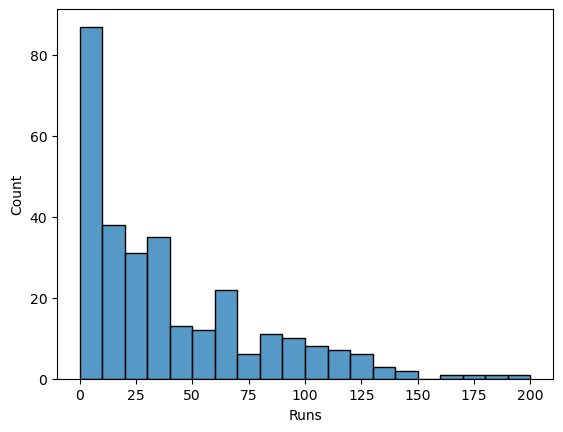

In [47]:
sns.histplot(data=df, x="Runs", bins=20)
plt.plot()

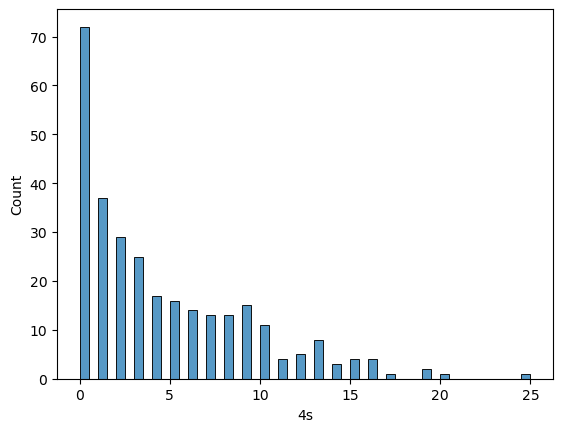

In [49]:
sns.histplot(data=df, x="4s", bins=50)
plt.show()